Explore correlations between variables such as rating and cost, distance and delivery time, etc., to uncover potential relationships. 

What will affect the Ratings? 

PROMO
- separate those with promo to those without
- further analysis it by teatime 






In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('./Datasets/Cleaned Grab SG Restaurants.csv')
data.head()

,name,address,cuisine,delivery_cost,lat,lon,opening_hours,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,total opening time hours
0,Texas Chicken,Texas Chicken - VivoCity,"[""Western"", ""Fast Food"", ""Halal"", ""Chicken"", ""...",570.0,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,75.75
1,Subway,Subway - Vivocity,"[""Healthy"", ""Sandwiches"", ""Fast Food"", ""Halal""...",570.0,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,4.2,197.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,49.00
2,LiHO Tea,LiHO Tea - Vivo City,"[""Same Prices In-Store"", ""Beverages"", ""Local"",...",560.0,1.264309,103.821369,"{""open"": true, ""displayedHours"": ""11:30-20:45""...",5000,4.5,353.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,41.0,64.75
3,Wingstop,Wingstop - VivoCity,"[""Halal"", ""Chicken"", ""Fast Food"", ""Burger"", ""W...",560.0,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,4.4,1391.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,45.0,70.00
4,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,"[""Japanese"", ""Ramen"", ""Noodles"", ""Asian""]",570.0,1.264810,103.822554,"{""open"": true, ""displayedHours"": ""10:30-21:00""...",5000,4.6,309.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,44.0,73.50


<!-- ## separate those with available promo with & without -->

In [3]:
# #getting only promo and rating column
# rating = pd.DataFrame(data['rating'])
# promo = pd.DataFrame(data['promo'])

# jointDF = pd.concat([promo, rating], axis = 1).reindex(promo.index)
# jointDF

In [4]:
# with_promo = pd.DataFrame(data['promo'].notnull())
# with_promo 
# # jointDF_with_promo = pd.concat([with_promo, rating], axis = 1).reindex(with_promo.index)
# # jointDF_with_promo


In [5]:
# without_promo = data[data['promo'].isnull()]
# jointDF_without_promo = pd.concat([without_promo, rating], axis = 1).reindex(without_promo.index)
# jointDF_without_promo

## ratings vs delivery cost

In [6]:
rating = pd.DataFrame(data['rating'])
delivery_cost = pd.DataFrame(data['delivery_cost'])

jointDF = pd.concat([delivery_cost, rating], axis = 1).reindex(delivery_cost.index)
jointDF

,delivery_cost,rating
0,570.0,3.8
1,570.0,4.2
2,560.0,4.5
3,560.0,4.4
4,570.0,4.6
...,...,...
16131,NaN,5.0
16132,NaN,NaN
16133,560.0,3.9
16134,NaN,3.6


       delivery_cost        rating
count   16085.000000  14004.000000
mean      984.926640      4.238346
std       656.544752      0.619217
min       199.000000     -1.000000
25%       450.000000      4.000000
50%       680.000000      4.300000
75%      1610.000000      4.600000
max     14000.000000      5.000000


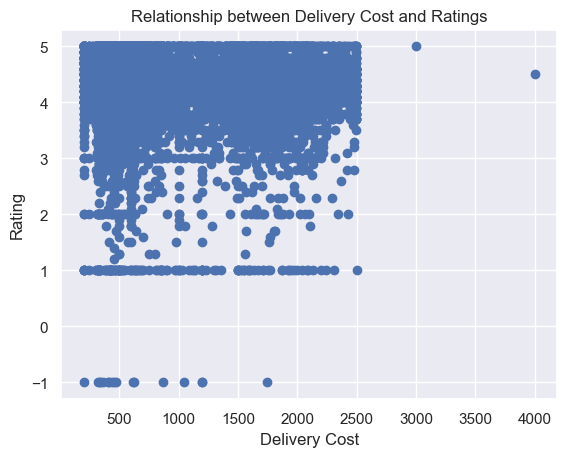

               delivery_cost    rating
delivery_cost       1.000000 -0.000057
rating             -0.000057  1.000000


In [7]:
summary_stats = data[['delivery_cost', 'rating']].describe()
print(summary_stats)

import matplotlib.pyplot as plt

plt.scatter(data['delivery_cost'], data['rating'])
plt.xlabel('Delivery Cost')
plt.ylabel('Rating')
plt.title('Relationship between Delivery Cost and Ratings')
plt.show()

correlation = data[['delivery_cost', 'rating']].corr()
print(correlation)


## delivery time 

In [8]:
# rating = pd.DataFrame(data['rating'])
# delivery_time = pd.DataFrame(data['delivery_time'])

# jointDF = pd.concat([delivery_time, rating], axis = 1).reindex(delivery_time.index)
# jointDF

rating = pd.DataFrame(data['rating'])
delivery_time = pd.DataFrame(data['delivery_time'])

# Concatenate the DataFrames
jointDF = pd.concat([delivery_time, rating], axis=1)

# Remove rows with NULL ratings
jointDF = jointDF.dropna(subset=['rating'])

# Reset index after dropping rows
jointDF = jointDF.reset_index(drop=True)

# Display the joint DataFrame without NULL ratings
print(jointDF)


       delivery_time  rating
0               43.0     3.8
1               42.0     4.2
2               41.0     4.5
3               45.0     4.4
4               44.0     4.6
...              ...     ...
13999           23.0     4.2
14000           26.0     5.0
14001           26.0     3.9
14002           30.0     3.6
14003           27.0     4.3

[14004 rows x 2 columns]


In [9]:
# Calculate the correlation coefficient
correlation = jointDF['delivery_time'].corr(jointDF['rating'])

# Print the correlation coefficient
print("Correlation coefficient between delivery time and ratings:", correlation)


Correlation coefficient between delivery time and ratings: -0.03872272201976684


The correlation coefficient is close to zero, indicating a weak linear relationship between delivery time and ratings.
The negative sign of the correlation coefficient (-0.0387) indicates a slight negative correlation. This means that as delivery time increases, ratings tend to decrease slightly, and vice versa. However, the correlation is very weak, so the relationship is not practically significant.
since the correlation is very weak, we can use regression


Intercept of Regression 	: b =  [4.30575986]
Coefficients of Regression 	: a =  [[-0.00179789]]

      Predictors  Coefficients
0  delivery_time     -0.001798



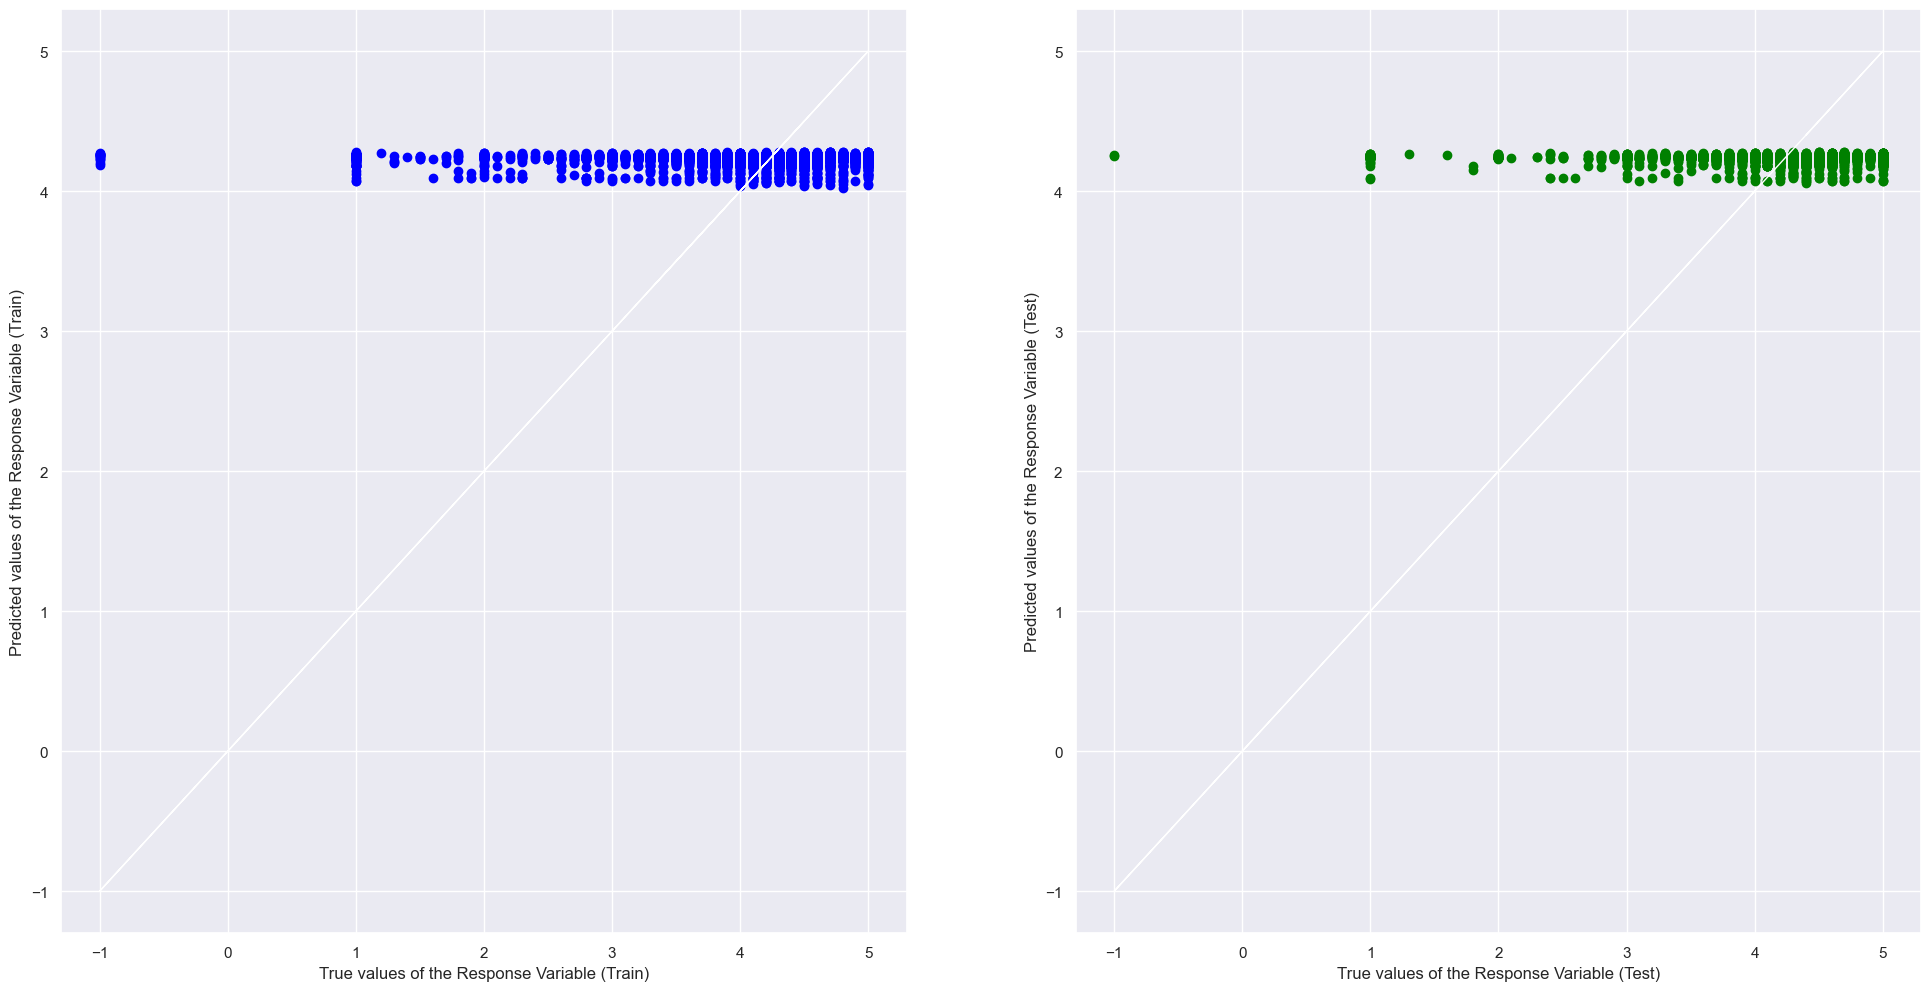

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.002044273891110171
Mean Squared Error (MSE) 	: 0.38919359275336013

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0005786346134870612
Mean Squared Error (MSE) 	: 0.3571785933506205



In [14]:
# # Import essential models and functions from sklearn
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Extract Response and Predictors
# predictors = ["delivery_time"]

# y = pd.DataFrame(data["rating"])
# X = pd.DataFrame(data[predictors])

# # Split the Dataset into Train and Test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# # Linear Regression using Train Data
# linreg = LinearRegression()         # create the linear regression object
# linreg.fit(X_train, y_train)        # train the linear regression model

# # Coefficients of the Linear Regression line
# print('Intercept of Regression \t: b = ', linreg.intercept_)
# print('Coefficients of Regression \t: a = ', linreg.coef_)
# print()

# # Print the Coefficients against Predictors
# print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
# print()

# # Predict Response corresponding to Predictors
# y_train_pred = linreg.predict(X_train)
# y_test_pred = linreg.predict(X_test)

# # Plot the Predictions vs the True values
# f, axes = plt.subplots(1, 2, figsize=(24, 12))
# axes[0].scatter(y_train, y_train_pred, color = "blue")
# axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
# axes[0].set_xlabel("True values of the Response Variable (Train)")
# axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
# axes[1].scatter(y_test, y_test_pred, color = "green")
# axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
# axes[1].set_xlabel("True values of the Response Variable (Test)")
# axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
# plt.show()

# # Check the Goodness of Fit (on Train Data)
# print("Goodness of Fit of Model \tTrain Dataset")
# print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
# print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
# print()

# # Check the Goodness of Fit (on Test Data)
# print("Goodness of Fit of Model \tTest Dataset")
# print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
# print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
# print()


# Remove null rows from the data
data_cleaned = data.dropna(subset=['delivery_time', 'rating'])

# Extract Response and Predictors
predictors = ["delivery_time"]

y = pd.DataFrame(data_cleaned["rating"])
X = pd.DataFrame(data_cleaned[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         
linreg.fit(X_train, y_train)        

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns=["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color="blue")
axes[0].plot(y_train, y_train, 'w-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color="green")
axes[1].plot(y_test, y_test, 'w-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


the 